In [1]:
import numpy as np
import matplotlib.pyplot as plt
import elpigraph

In [2]:
X = np.genfromtxt('data/tree_data.csv', delimiter=',')[:,:2]
X = np.concatenate((np.zeros(25)[None],np.linspace(-1,1,25)[None]),axis=0).T

PointWeights=np.ones(len(X))[None].T
SpringLaplacianMatrix = np.array([[0, 0, 0],
                            [0, 0, 0],
                            [0, 0, 0]])
NodePositions=np.array([[-1, 0],
    [0, -1],
                        
                        [1, 1]])
SquaredX=np.sum(X**2,axis=1,keepdims=1)
FixNodesAtPoints=[[0, 1, 2, 3, 4, 5]]

FixedNodePositions = np.array([X[inds].mean(axis=0) for inds in FixNodesAtPoints]) #init fixed nodes 

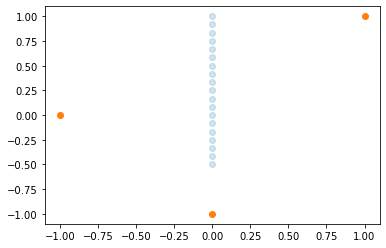

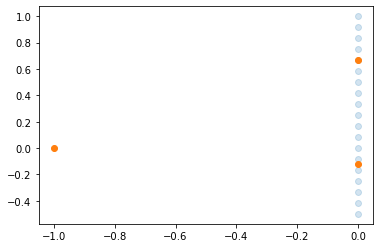

In [3]:
flat_FixNodesAtPoints = [item for sublist in FixNodesAtPoints for item in sublist] #fixed datapoints
keep = [i for i in range(len(X)) if i not in flat_FixNodesAtPoints] #fitted datapoints

#fitted subset
X_move, SquaredX_move, PointWeights_move = X[keep], SquaredX[keep], PointWeights[keep]
NodePositions_move = NodePositions[len(FixNodesAtPoints):]
SpringLaplacianMatrix_move = SpringLaplacianMatrix[len(FixNodesAtPoints):,len(FixNodesAtPoints):]

partition, dists = elpigraph.src.core.PartitionData(X_move,NodePositions_move,SquaredX=SquaredX_move,MaxBlockSize=1000000)
NewNodePositions = elpigraph.src.distutils.FitGraph2DataGivenPartition(X_move, PointWeights_move, SpringLaplacianMatrix_move,partition)
NewNodePositions = np.concatenate(
    (
        NodePositions[:len(FixNodesAtPoints)], #fixed node positions
        NewNodePositions #fitted nodes
    ))

plt.scatter(*X[keep].T[:2],alpha=.2)
plt.scatter(*NodePositions.T[:2]);plt.show()
plt.scatter(*X[keep].T[:2],alpha=.2)
plt.scatter(*NewNodePositions.T[:2])